In [1]:
import warnings
# No annoying warnings
warnings.filterwarnings('ignore')
# Because we always need that
# plot within the notebook
%matplotlib inline
import matplotlib.pyplot as mpl
import numpy as np

# Create Fake Data, here a 3rd order polynome (up to x**2)

In [2]:
x = np.random.uniform(-3,8,100)

dy = np.random.normal(scale=30,size=100) # errors
y = x*3 + 2 + 4*x**2 + dy  # polynome containing errors

Let's see how it looks

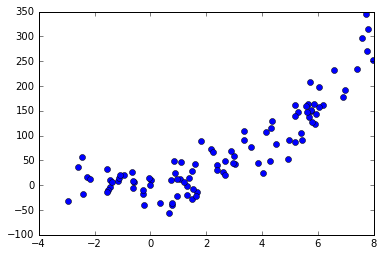

In [3]:
_ = mpl.plot(x,y,"bo")

# Fit the Data thanks to modefit

In [4]:
import modefit

### Use get_polyfit to get the fitter object

Sets the data and the polynomial degree while you load it

In [5]:
polyfit = modefit.get_polyfit(x,y,dy, 3, legendre=False) # Do not use Legendre Polynomial be regular ax + bx**2 etc

You object is loaded. The just fit() to fit the data.

You can set options for the fit parameters:
   * X_guess=initial_gues ; 
   * X_fixed=boolean_to_fix_the_param ;
   * X_boundaries=[min,max]

In [8]:
time polyfit.fit(a0_boundaries=[0,None]) # Say that a0 have to be positive

CPU times: user 6.63 ms, sys: 1.43 ms, total: 8.07 ms
Wall time: 6.81 ms


Let's see how it looks like (now that you've fit you can see the best fitted value)

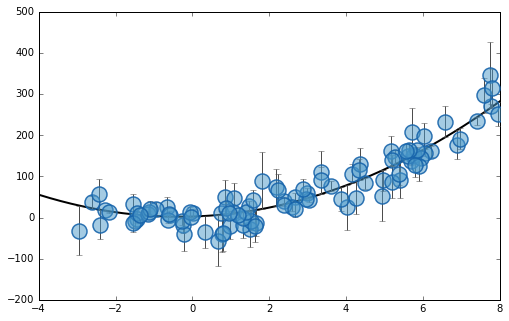

In [9]:
_ = polyfit.show(ms=15, mew=1.5)

Add the fitted values (and chi2)

In [11]:
polyfit.fitvalues

{'a0': 2.4233657514982081,
 'a0.err': 0.30186943897948704,
 'a1': 2.7907959809402496,
 'a1.err': 0.24050062098886898,
 'a2': 4.014832620120842,
 'a2.err': 0.036195728798904592,
 'chi2': 96.92093389529485}

## MCMC instead of fit

Nothing easier, simply use run_mcmc() instead of fit (it is recommanded to use fit() first then mcmc such that there is good initial values for the mcmc )

In [12]:
time polyfit.run_mcmc(500)

-> emcee EmsembleSampler defined
-> MCMC sampler.run_mcmc() done
CPU times: user 411 ms, sys: 17.2 ms, total: 428 ms
Wall time: 472 ms


Look at the Walkers to have an idea of the burnin value

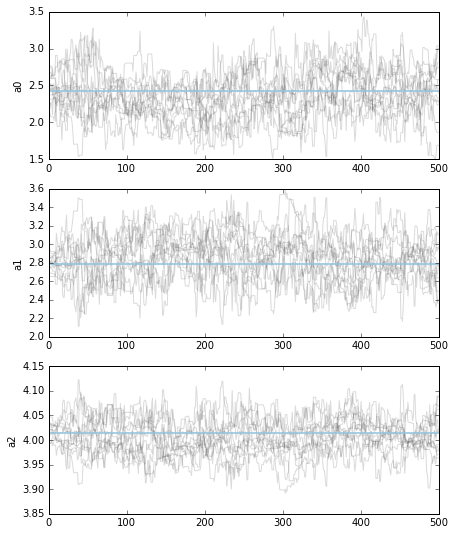

In [13]:
polyfit.mcmc.show_walkers()

Here a burnin of ~50 seems largely enough

Remark that once the burnin is set, you can replot walker that will highlight the burnin value. Change `burnin` anytime by simple resetting it 

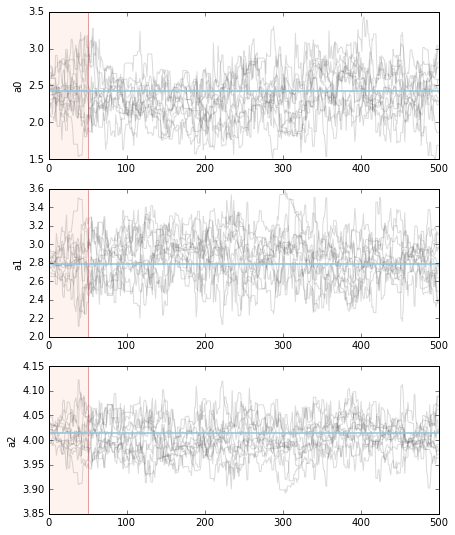

In [15]:
polyfit.mcmc.set_burnin(50)
polyfit.mcmc.show_walkers()

####  See the corner plot

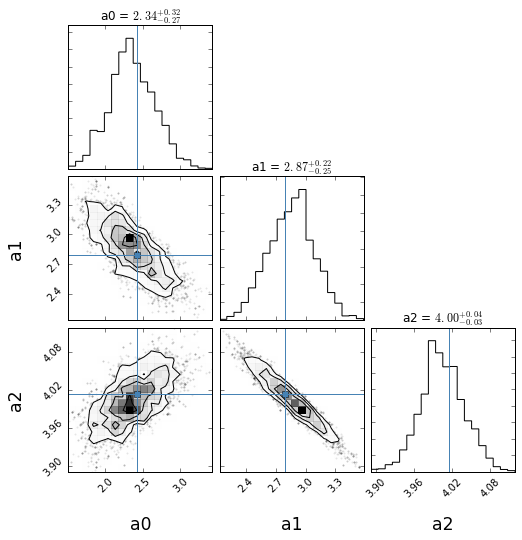

In [16]:

polyfit.mcmc.show_corner()